In [1]:
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
#Read data
data = pd.read_csv('kc_housedata.csv')

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
# Exploratory Data Analysis
# Check number of data points in the data set
len(data)

21613

In [6]:
# Check the number of features in the data set
print(len(data.columns))

21


In [7]:
#Check any number of columns with NaN
print(data.isnull().any().sum(),'/', len(data.columns))

0 / 21


In [8]:
# Check any number of data points with NaN
print(data.isnull().any(axis=1).sum(),'/', len(data))

0 / 21613


In [9]:
# Checking correlations between features and target
# Picking features
features = data.iloc[:,3:].columns.tolist()

In [10]:
features

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [11]:
# Picking target
target = data.iloc[:,2].name #use .name if only 1 column to retrieve the column name

In [12]:
target

'price'

In [13]:
data2 = data.drop(['id','date'], axis =1)

In [14]:
# Create correlation matrix
corr_matrix = data2.corr()
corr_matrix.iloc[0,:] #Pick the desired row only

price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64

In [15]:
# Sort the correlation matrix
corr_matrix.iloc[0,:].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
zipcode         -0.053203
Name: price, dtype: float64

In [16]:
# Predicting House Sale Prices 
# using linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [17]:
#Simple linear model
regr = LinearRegression()
pick_features = data[['sqft_living','grade', 'sqft_above', 'sqft_living15','bathrooms','view','sqft_basement','lat','waterfront','yr_built','bedrooms']]

In [18]:
pick_features.head()

,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,sqft_basement,lat,waterfront,yr_built,bedrooms
0,1180,7,1180,1340,1.00,0,0,47.5112,0,1955,3
1,2570,7,2170,1690,2.25,0,400,47.7210,0,1951,3
2,770,6,770,2720,1.00,0,0,47.7379,0,1933,2
3,1960,7,1050,1360,3.00,0,910,47.5208,0,1965,4
4,1680,8,1680,1800,2.00,0,0,47.6168,0,1987,3


In [19]:
# Predictor and target variable
X = pick_features.values
Y = data[target].values

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y ,test_size=0.2)

In [21]:
from sklearn.preprocessing import StandardScaler
#stardardizing
scaler = StandardScaler().fit(X_train)
std_X_train = scaler.transform(X_train)
# also standardize xtest
std_X_test = scaler.transform(X_test)

In [22]:
# fit model
regr.fit(std_X_train,Y_train)
prediction_linear= regr.predict(std_X_test)

In [23]:
regr.score(std_X_test,Y_test)

0.7018890417976809

In [25]:
from sklearn.metrics import r2_score
r2_score(Y_test,prediction_linear)

0.7018890417976809

In [26]:
import matplotlib.pyplot as pltp

In [27]:
std_X_test.shape

(4323, 11)

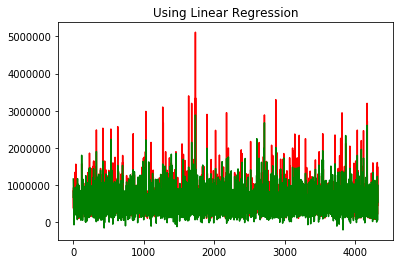

In [28]:
plt.title("Using Linear Regression")
plt.plot(np.arange(4323),Y_test, color='r')
plt.plot(np.arange(4323),prediction_linear, color='g')

In [29]:
# using xgboost
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

In [30]:
# fit the model
xgb_model.fit(std_X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.08, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.75)

In [31]:
predictions_xgb = xgb_model.predict(std_X_test)

In [32]:
from sklearn.metrics import r2_score

In [33]:
r2_score(Y_test,predictions_xgb)

0.8302447342983521

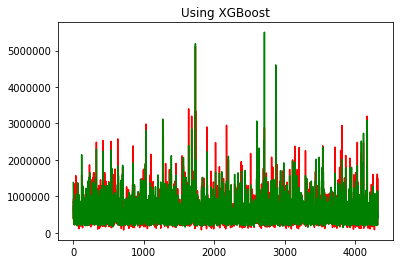

In [34]:
plt.title("Using XGBoost")
plt.plot(np.arange(4323),Y_test, color='r')
plt.plot(np.arange(4323),predictions_xgb, color='g')

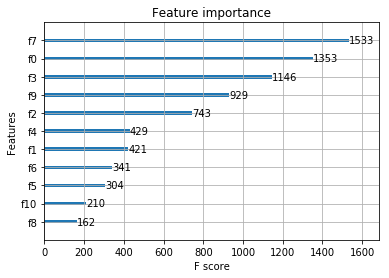

In [35]:
# Plot feature importances
xgb.plot_importance(xgb_model)

In [36]:
pick_features.columns.values

array(['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms',
       'view', 'sqft_basement', 'lat', 'waterfront', 'yr_built',
       'bedrooms'], dtype=object)

In [37]:
xgb_model.get_xgb_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.08,
 'max_delta_step': 0,
 'max_depth': 7,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'nthread': 1,
 'objective': 'reg:linear',
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': 0,
 'silent': 1,
 'subsample': 0.75}

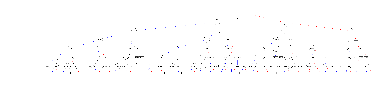

In [38]:
xgb.plot_tree(xgb_model)

In [39]:
# Use gradient boosting 
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(n_estimators=100, learning_rate=0.08, subsample=0.75, max_depth=7)

In [40]:
# fitting data
gbrt.fit(std_X_train,Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.08, loss='ls', max_depth=7, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=0.75, verbose=0, warm_start=False)

In [41]:
prediction_gbrt = gbrt.predict(std_X_test)
r2_score(Y_test, prediction_gbrt)

0.8311070322718408

In [43]:
# Training parameters of XGBoost
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.model_selection import GridSearchCV   #Perforing grid search

In [44]:
#Define a function for modeling and cross-validation
#This function will do the following:

#fit the model
#determine training accuracy
#determine training AUC
#determine testing AUC
#update n_estimators with cv function of xgboost package
#plot Feature Importance

In [45]:
X_train

array([[2.120e+03, 8.000e+00, 1.830e+03, ..., 0.000e+00, 1.908e+03,
        4.000e+00],
       [8.400e+02, 6.000e+00, 8.400e+02, ..., 0.000e+00, 1.951e+03,
        2.000e+00],
       [2.070e+03, 8.000e+00, 1.780e+03, ..., 0.000e+00, 1.931e+03,
        3.000e+00],
       ...,
       [1.794e+03, 7.000e+00, 1.794e+03, ..., 0.000e+00, 2.005e+03,
        3.000e+00],
       [1.500e+03, 7.000e+00, 1.420e+03, ..., 0.000e+00, 1.929e+03,
        4.000e+00],
       [1.480e+03, 7.000e+00, 1.480e+03, ..., 0.000e+00, 1.962e+03,
        3.000e+00]])

In [51]:
def XGB_tuning(alg, X_train,Y_train, X_test,Y_test,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        #get the parameters
        xgb_param = alg.get_xgb_params()
        
        xgtrain = xgb.DMatrix(X_train, label=Y_train)
        xgtest = xgb.DMatrix(X_test)
        
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds, early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(X_train, Y_train,eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_train)
       
    #Print model report:
    print("\nModel Report")
    print("R^2 squared (Train): {}".format(metrics.r2_score(Y_train,dtrain_predictions)))
    
    # Predict on testing data:
    dtest_predictions = alg.predict(X_test)
    print("R^2 squared (Test): {}".format(metrics.r2_score(Y_test,dtest_predictions)))
    
    # Plot feature importances
    xgb.plot_importance(alg)
    


Model Report
R^2 squared (Train): 0.9474423827898001
R^2 squared (Test): 0.835290206425133


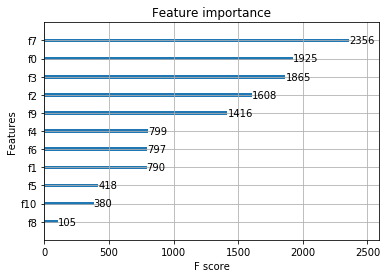

In [52]:
# Step 1- Find the number of estimators for a high learning rate
xgb1 = xgb.XGBRegressor(
        learning_rate =0.08,
        n_estimators=1000,
        max_depth=5,
        min_child_weight=1,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        scale_pos_weight=1,
        seed=27)
XGB_tuning(xgb1, std_X_train,Y_train, std_X_test,Y_test)

In [53]:
# Check number of estimators
xgb1.get_params()['n_estimators']

461

In [186]:
# Step 2: Tune max_depth and min_child_weight
# We tune these first as they will have the highest impact on model outcome. 
# To start with, let’s set wider ranges and then we will perform another iteration for smaller ranges.

In [54]:
#Grid seach on subsample and max_features
#Choose all predictors except target & IDcols
param_test1 = {
    'max_depth':range(4,9,2),
    'min_child_weight':range(1,5,2)
}
gsearch1 = GridSearchCV(estimator = xgb.XGBRegressor( learning_rate =0.08, n_estimators=461, max_depth=5,
                                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                        scale_pos_weight=1, seed=27), 
                       param_grid = param_test1,iid=False, cv=5)
gsearch1.fit(std_X_train,Y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.08, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=461,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8),
       fit_params=None, iid=False, n_jobs=1,
       param_grid={'max_depth': range(4, 9, 2), 'min_child_weight': range(1, 5, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [55]:
 # Check results
gsearch1.best_params_

{'max_depth': 6, 'min_child_weight': 1}

In [56]:
# Lets go one step deeper and look for optimum values. 
# We’ll search for values 1 above and below the optimum values because we took an interval of two.

param_test2 = {
 'max_depth':[5,6,7],
 'min_child_weight':[1,2]
}

gsearch2 = GridSearchCV(estimator = xgb.XGBRegressor( learning_rate =0.08, n_estimators=461, max_depth=5,
                                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                        scale_pos_weight=1, seed=27), 
                       param_grid = param_test2,iid=False, cv=5)
gsearch2.fit(std_X_train,Y_train)

 # Check results
gsearch2.best_params_

{'max_depth': 5, 'min_child_weight': 2}

In [57]:
#Step 3: Tune gamma
# tune gamma value using the parameters already tuned above. 

param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}

gsearch3 = GridSearchCV(estimator = xgb.XGBRegressor( learning_rate =0.08, n_estimators=461, max_depth=5,
                                        min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                        scale_pos_weight=1, seed=27), 
                       param_grid = param_test3,iid=False, cv=5)
gsearch3.fit(std_X_train,Y_train)

 # Check results
gsearch3.best_params_

{'gamma': 0.0}

In [58]:
# Step 4: Tune subsample and colsample_bytree
param_test4 = {
 'subsample':[i/10.0 for i in range(6,9)],
 'colsample_bytree':[i/10.0 for i in range(6,9)]
}

gsearch4 = GridSearchCV(estimator = xgb.XGBRegressor( learning_rate =0.08, n_estimators=461, max_depth=5,
                                        min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                        scale_pos_weight=1, seed=27), 
                       param_grid = param_test4,iid=False, cv=5)
gsearch4.fit(std_X_train,Y_train)

 # Check results
gsearch4.best_params_

{'colsample_bytree': 0.8, 'subsample': 0.8}

In [59]:
# Step 5: Tuning Regularization Parameters
# Next step is to apply regularization to reduce overfitting.

param_test5 = {
 'reg_alpha':[0.005, 0.01, 0.05, 0.1, 1, 100]
}

gsearch5 = GridSearchCV(estimator = xgb.XGBRegressor( learning_rate =0.08, n_estimators=461, max_depth=5,
                                        min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                        scale_pos_weight=1, seed=27), 
                       param_grid = param_test5,iid=False, cv=5)
gsearch5.fit(std_X_train,Y_train)

 # Check results
gsearch5.best_params_

{'reg_alpha': 100}


Model Report
R^2 squared (Train): 0.9480862239074884
R^2 squared (Test): 0.8392827687538766


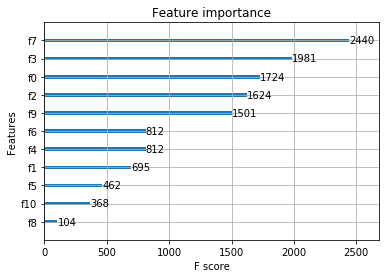

In [60]:
xgb_new = xgb.XGBRegressor(
        learning_rate =0.08,
        n_estimators=1000,
        max_depth=5,
        min_child_weight=2,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=100 ,
        scale_pos_weight=1,
        seed=27)
XGB_tuning(xgb_new, std_X_train,Y_train, std_X_test,Y_test)

In [61]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """ Generate a simple plot of the test and traning learning curve. 
    Parameters ---------- 
    estimator : object type that implements the "fit" and "predict" methods.
    An object of that type which is cloned for each validation. 
    title : string Title for the chart. 
    X : array-like, shape (n_samples, n_features) 
    Training vector, where n_samples is the number of samples and n_features is the number of features. 
    y : array-like, shape (n_samples) or (n_samples, n_features), 
    optional Target relative to X for classification or regression; None for unsupervised learning. 
    ylim : tuple, shape (ymin, ymax), optional 
    Defines minimum and maximum yvalues plotted. 
    cv : integer, cross-validation generator, optional 
    If an integer is passed, it is the number of folds (defaults to 3). 
    Specific cross-validation objects can be passed, see sklearn.cross_validation module for the list of possible objects 
    n_jobs : integer, optional Number of jobs to run in parallel (default 1). """ 
    
    
    plt.figure() #Create figure (?)
    plt.title(title) #Give title to plot
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    #call learning_curve function - see documetation for further details
    train_sizes, train_scores, test_scores = learning_curve(estimator, X,y, cv=cv, n_jobs = n_jobs, train_sizes = train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label="Cross-validation score")
    
    plt.legend(loc='best')
    
    return plt

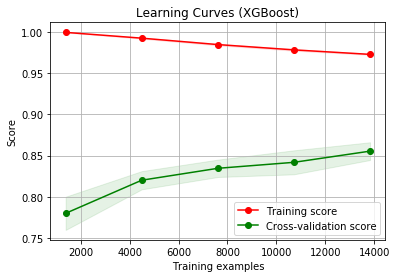

In [62]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
n_jobs=1
cv = ShuffleSplit(n_splits=10, test_size=0.2)
title = "Learning Curves (XGBoost)" 
estimator = xgb.XGBRegressor(
        learning_rate =0.08,
        n_estimators=1000,
        max_depth=5,
        min_child_weight=2,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=100 ,
        scale_pos_weight=1,
        seed=27)
plot_learning_curve(estimator, title, std_X_train, Y_train, cv=cv, n_jobs=n_jobs) #use cv and n_jobs from above
plt.show()